In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML


STEP 1 data pre processing


In [3]:
#Load the dataset 
boston=load_boston()

#description of he dataset
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Put the data into pandas Dataframes
features = pd.DataFrame(boston.data,columns=boston.feature_names)
features


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [6]:
#storing target in another dataframe calld target
target=pd.DataFrame(boston.target,columns=['target'])
target#calling target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [7]:
max(target['target'])

50.0

In [8]:
min(target['target'])

5.0

In [10]:
#going to concatenate to datasets "columnwise"
#if written normally without axis it would concatenate rowwose but we wNT TO DO IT COLUMNWISE
df=pd.concat([features,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Now we will learn how to visualise the data
DataFrame.describe() describes the parameter of each column


In [9]:
#use round(decimals=2) to set the precision to 2 decimal places
df.describe().round(decimals=2)

NameError: name 'df' is not defined

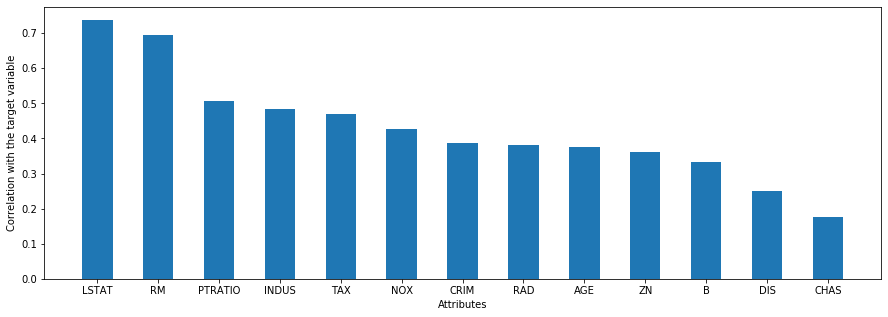

In [12]:
#Calculating correlation between every column on the data
corr=df.corr('pearson')

#take absolute values of correlations
corrs=[abs(corr[attr]['target']) for attr in list(features)]

#make a list of pairs[(corr,features)]
l=list(zip(corrs,list(features)))

#sort the list of pairs in reverse/descending orders.
#with the correlation as the key for sorting
l.sort(key = lambda x : x[0], reverse=True)

#"unzip" pairs to two lists
#zip(*l) takes a list thta looks like[[a,b,c],[d,e,f],[g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs,labels=list(zip((*l)))

#Plot correlations with respect to the target variable as a bar graph
index=np.arange(len(labels))
plt.figure(figsize=(15,5))
plt.bar(index,corrs,width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.xticks(index,labels)
plt.show()





WE OBSEVE FROM THE BAR GRAPH THAT BAR GRAPH GENERATED ABOVE,THE LSTAT AND RM HAVE THE HIGHEST ABSOLUTE CORRELATION VALUES

NORMALIZE THE DATA

Normalize the data with MinMaxScalar


In [10]:
X=df['LSTAT'].values
Y=df['target'].values

NameError: name 'df' is not defined

In [14]:
#Before normalization 
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [15]:
x_scaler = MinMaxScaler()
X=x_scaler.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scaler = MinMaxScaler()
Y=y_scaler.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]


In [16]:
#After normalization
print(Y[:5])
print(X[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]
[0.08967991 0.2044702  0.06346578 0.03338852 0.09933775]


Splitting the dataset into fixed sets.
u kno , see the documentation.


In [17]:
def error(m , x, c, t):
    N =x.size
    e = (sum(((m * x + c)-t)**2))
    return e * 1/(2*N)
    

 #0.2 indicates 20% of the data is randomly sampled as testing data

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2)

In [19]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c)-t) * x)
    grad_c = sum(2 * ((m * x + c)-t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c
    
    

Error threshold : If the error fails below the threshold , the gradient descent process is stopped and the weights are returned.


In [20]:
def gradient_descent(init_m, init_c, x, t,learning_rate, iterations,error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m ,x ,c ,t)
        if e < error_threshold:
            print('Error less than the threshold.Stopping gradient descent')
            break
        error_values.append(e)
        m, c=update(m, x, c, t, learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values
    
    
    

how to use gradient descent function in next column:


In [21]:
%%time
init_m =0.9
init_c = 0
learning_rate =0.001
iterations = 170
error_threshold = 0.001
m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations,error_threshold)



Wall time: 108 ms


In [22]:
mc_values_anim = mc_values[0:170:5]

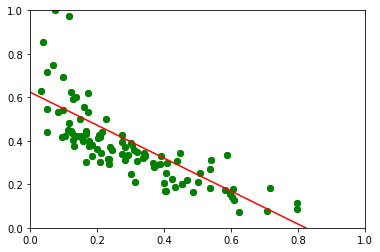

In [23]:
#As the number of iterations increasses ,changes in the line are less noticable.
#Inorder to reduce the processing time for the animation,it is adviced to choose small intervals.

fig, ax = plt.subplots()
ln, = plt.plot([],[],'ro-',animated=True)

def init():
    plt.scatter(xtest,ytest,color='g')
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,

def update_frame(frame):
    m , c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -.5 + c
    x2, y2 = 1.5,m * 1.5 + c
    ln.set_data([x1,x2],[y1,y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames=range(len(mc_values_anim)),
                           init_func = init,blit=True)

HTML(anim.to_jshtml())
    

Plotting the regression line upon the training data set.

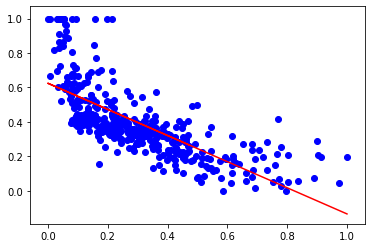

In [24]:
plt.scatter(xtrain, ytrain ,color='b')
plt.plot(xtrain,(m * xtrain + c),color='r')

Visualisation Of the Learning process 
PLotting Error values

Text(0.5, 0, 'Iterations')

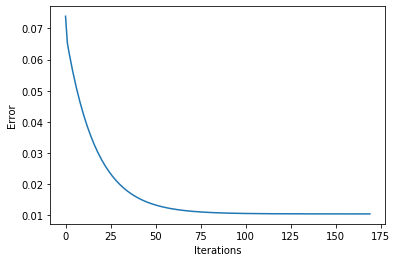

In [25]:
  plt.plot(np.arange(len(error_values)),error_values)
  plt.ylabel('Error')
  plt.xlabel('Iterations')


In [26]:
#Checking the model on unseen data by model
#Cslculate the prediction on the test set as a vectorized operation 
predicted = (m * xtest) + c


In [27]:
#compute MSE for the predicted values on the testing set
mean_squared_error(ytest, predicted)

0.012005569909513875

In [1]:
#put xtest, ytest and predicted values into a single Dataframe so that we
#can see the predicted values alongside the testing set
p = pd.DataFrame(list(zip(xtest, ytest, predicted)),columns=['x','target_y','predicted_y'])
p.head()
predicted


NameError: name 'pd' is not defined